# DiploDatos 2020 - Coronavirus en Argentina

## Práctico Análisis y Visualización de Datos

En este notebook se explicarán los métodos para la carga inicial de los datos que vamos a usar en el proyecto, se describirá la estructura general de los mismos, y veremos algunos métodos básicos de análisis.

Antes de comenzar a trabajar con CSVs, siempre es recomendable descargar el dataset en nuestra computadora y observarlo directamente con alguna herramienta de procesamiento de texto, para tener una visión rápida del tipo de datos con el cual trabajeremos, pero también para asegurarnos que estamos utilizando un archivo con el formato correcto.

El dataset se encuetra en:

https://github.com/lucia15/Datos-Covid19-Argentina

In [1]:
### Aumentar el ancho del notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
# Importamos las librerías necesarias
import os
import sys
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 100)

In [3]:
## Seteamos semilla random para reproducibilidad
np.random.seed(0)

### Inicialización y carga de datos

Puesto que el dataset se actualiza diariamente, es conveniente cargarlo directamente desde Github, para trabajar siempre la última versión.

En el mismo tenemos tres subconjuntos de datos.

In [4]:
url = 'https://raw.githubusercontent.com/lucia15/Datos-Covid19-Argentina/master'

In [5]:
file1 = os.path.join(url, 'Argentina-covid19.csv')

data1 = pd.read_csv(file1, error_bad_lines=False)

In [6]:
file2 = os.path.join(url, 'Argentina-covid19-por-provincia.csv')

data2 = pd.read_csv(file2, error_bad_lines=False)

In [7]:
file3 = os.path.join(url, 'Argentina-covid19-fallecidos.csv')

data3 = pd.read_csv(file3, error_bad_lines=False)

### Análisis exploratorio

In [8]:
# Obtenemos la cantidad de filas y columnas
print("Cantidad de registros: ", data1.shape[0])
print("Cantidad de columnas: ", data1.shape[1])

Cantidad de registros:  96
Cantidad de columnas:  29


In [9]:
# Listamos las columnas y sus tipos de datos
data1.dtypes

fecha                       object
dia_cuarentena             float64
casos_nuevos                 int64
casos_total                  int64
%mujer                      object
%varon                      object
mujer_total                float64
varon_total                float64
franja_etaria               object
edad_prom                  float64
importados_total             int64
importados_nuevos            int64
local_total                  int64
local_nuevos                 int64
comunitario_total            int64
comunitario_nuevos         float64
en_investigacion_total       int64
en_investigacion_nuevos      int64
muertes_total                int64
muertes_nuevos               int64
alta_total                 float64
alta_nuevos                float64
alta_definitiva            float64
descartados_total          float64
descartados_nuevos         float64
tests_realizados_total     float64
tests_realizados_nuevos    float64
test_por_millon_hab         object
observaciones       

Todas estas variables están explicadas en el GitHub donde se enecuentra el dataset (revisar).

In [10]:
# Cambiamos el tipo de la columna 'fecha' de object a datetime
data1['fecha'] = pd.to_datetime(data1['fecha'], format='%Y-%m-%d')

In [11]:
# Analizamos 2 muestras de filas, usamos transpose() para visualizar los datos con mayor comodidad
data1.sample(2).transpose()

,26,84
fecha,2020-03-31 00:00:00,2020-05-28 00:00:00
dia_cuarentena,11,69
casos_nuevos,88,769
casos_total,1054,14702
%mujer,"42,5","49,1"
%varon,"57,5","50,9"
mujer_total,448,7219
varon_total,606,7483
franja_etaria,20-59,20-59
edad_prom,45,37


In [12]:
# TO DO
# Hacer una exploración similar de los otros dos conjuntos de datos

#### Tareas a realizar:

*   Análisis estadístico de variables

> Seleccionar un conjunto de al menos **cuatro** variables que les resulten de interés y:
1.   Usar distintos tipos de gráficos para describir sus distribuciones
2.   Analizar Outliers (si los hubiera)
3.   Calcular estadísticos clásicos (media, mediana, moda, desviación estandar)

* Evolución de variables en el tiempo

> Seleccionar al menos **tres** variables y graficar como fueron cambiando desde el primer día hasta hoy.

*   Analisis de probabilidades condicionales e independencia entre dos variables.

>  Algunas ideas guía:
1.   ¿Cuál es la probabilidad de que un infectado sea mujer (varón)?
2.   ¿Cuál es la probabilidad de que un infectado sea de Córdoba (u otra provincia)?
3.   Probabilidad de que un fallecido sea mujer (varón)
4.   Probabilidad de que un fallecido sea mujer (varón) dado que está en la franja etaria 60-80 (u alguna otra).
5.   Probabilidad de que un fallecido en la franja etaria 60-80 sea mujer (varón).
6.   Probabilidad de que un fallecido sea de CABA dado que es mujer. Y viceversa, que sea mujer dado que es de CABA.
7.   Probabilidad de que un fallecido en la franja etaria 30-60 sea de Chaco. (Quizás encontremos alguna correlación interesante entre edad y provincia).
8.   ¿El género de un fallecido es independiente de la franja etaria?
9.   ¿El género de un fallecido es independiente de la provincia?
10.  ¿La franja etaria de un fallecido es independiente de la provincia?


> Con al menos **un** par de variables realizar un análisis de este tipo.

Pueden agregar más análisis que consideren relevantes, estos tres puntos son el mínimo requerido.

#### Entregas:

* Un **breve informe** en el cual desarrollen cada uno de los puntos anteriores. En el mismo deben incluir solo los gráficos y resultados obtenidos y las conclusiones que de ellos se desprendan. No agregar código al informe. 

* Una **notebook** que refleje el trabajo realizado (aquí se verá el código). Puede ser esta misma notebook intervenida por ustedes, u otra nueva que inicien, como les resulte más cómodo trabajar.

### Algunos Ejemplos:

A continuación presento una serie de ejemplos que los ayudaran a realizar las tareas propuestas.

Pueden retomar estos y completarlos o proponer otros y por supuesto reutilizar el código qué necesiten.

Los **TO DO** que agregué no son obligatorios, son solo sugerencias por si deciden retomar los análisis que aquí propongo. Pero ustedes pueden analizar las variables que deseen en cuanto cumplan las tres tareas propuestas anteriormente. 

1. Distribución por género de los fallecidos

In [13]:
data3["genero"].value_counts()

hombre    398
mujer     295
Name: genero, dtype: int64

In [14]:
def plot_hist(variable, title, xticks, data, filename=None):
    ax = data[variable].value_counts().plot(kind='barh', figsize=(10,6), color='coral', fontsize=13);
    ax.set_alpha(0.8)
    ax.set_title(title, fontsize=18)
    ax.set_xlabel('', fontsize=18);
    ax.set_xticks(xticks)

    # create a list to collect the plt.patches data
    totals = []

    # find the values and append to list
    for i in ax.patches:
        totals.append(i.get_width())

    # set individual bar lables using above list
    total = sum(totals)

    # set individual bar lables using above list
    for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_width()+.3, i.get_y()+.38, \
                str(round((i.get_width()/total)*100, 2))+'%', fontsize=15, color='dimgrey')

    # invert for largest on top 
    ax.invert_yaxis()
    
    if filename is not None:
        plt.savefig(filename)

In [15]:
## Obtenemos la fecha del día de hoy:
today = datetime.date.today()
print(today)

2020-06-09


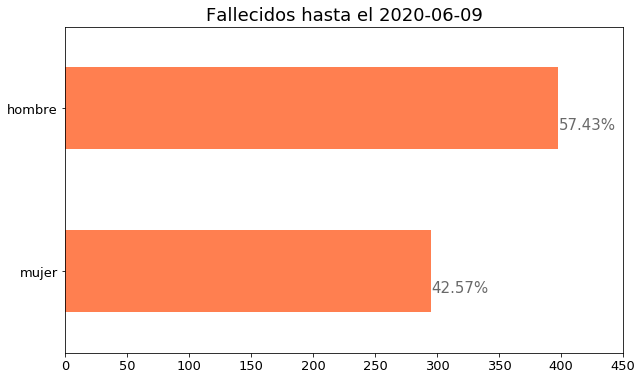

In [16]:
plot_hist(variable='genero', 
          title='Fallecidos hasta el '+ str(today),
          xticks=[0, 50, 100, 150, 200, 250, 300, 350, 400, 450], 
          data=data3)

#### TO DO

Reutilizando el código anterior ver la distribución de fallecidos por provincias

2. Distribución etaria de los fallecidos

In [17]:
def plot_edad(data, title, filename=None):
    
    edades = data['edad'].dropna()
    
    ## Calculo estadisticos descriptivos
    edades_sort = edades.sort_values().astype('int')
    moda = edades.mode().values[0]
    media = edades_sort.mean()
    mediana = edades_sort.median()
    std = edades_sort.std()

    # Grafico histograma por edades
    fig, axes = plt.subplots(figsize=(10,6))
    ax = axes
    edades.plot.hist(bins=16, rwidth=0.9,color='#607c8e', ax=ax)
    ax.set_title(title, fontsize=18)
    ax.set_ylabel('Número de muertes')
    ax.set_xlabel('Edad (años)')
    ax.axvline(media, linestyle='--', color='k', label=r'$\mathrm{media: }$' + r'$ {{{:.0f}}}\pm {{{:.0f}}}$'.format(media, std))
    ax.axvline(mediana, linestyle='-.', color='k', label=r'$\mathrm{mediana: }$' + r'$ {{{:.0f}}}$'.format(mediana))
    ax.axvline(moda, linestyle=':', color='k', label=r'$\mathrm{moda: }$' + r'$ {{{:.0f}}}$'.format(moda))
    #text = 'Media: {:.1f}\nMediana: {:.1f}\nModa: {:.1f}\nStd: {:.1f}'.format(media, mediana, moda, std)
    #ax.text(0.7, 0.35, text, transform=ax.transAxes, fontsize=28)
    ax.legend(loc='upper left')
    #ax.legend(loc='best')
    
    if filename is not None:
        plt.savefig(filename)

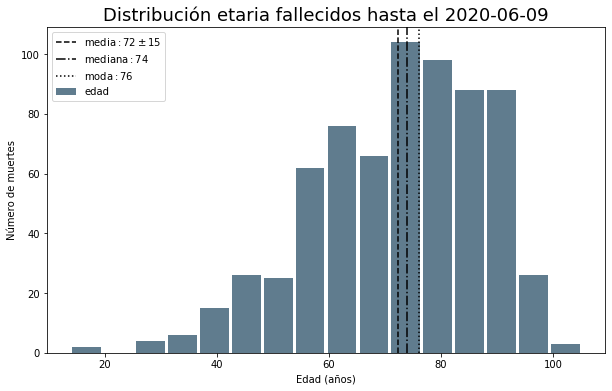

In [18]:
plot_edad(data3, title='Distribución etaria fallecidos hasta el ' + str(today))

¿Ven algún outlier?

3. Evolución temporal del número de casos diarios

In [19]:
fechas = (data1['fecha'].dt.day).astype(str) +'/'+ (data1['fecha'].dt.month).astype(str)

casos_nuevos = data1['casos_nuevos']

In [20]:
def time_plot(x, y, title, ylabel, y2=None, label1='', label2='', filename=None):

    fig, ax = plt.subplots(figsize=(10, 5))

    if y2 is not None:
        ax.plot(x, y, '-o', label=label1)
        ax.plot(x, y2, '-s', label=label2)
    else:
        ax.plot(x, y, '-o')
        
    ax.set_title(title, fontsize=20)
    ax.set_xlabel('Día', fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)

    ax.set_xticks(x[::4])
    ax.set_xticklabels(x[::4])

    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
    plt.legend(loc='best')
    plt.grid()

    plt.tight_layout()
    
    if filename is not None: 
        plt.savefig(filename)
    
    plt.show()

No handles with labels found to put in legend.


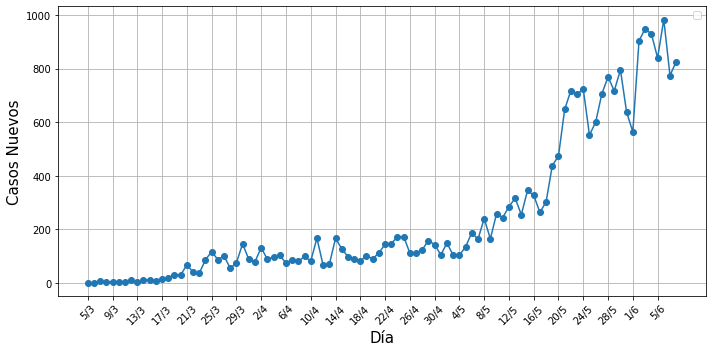

In [21]:
time_plot(fechas, casos_nuevos, title='', ylabel='Casos Nuevos')

#### TO DO

Reproducir el mismo gráfico utilizando otras variables. Por ejemplo:

* Casos acumulados
* Altas del día 
* Altas acumuladas
* Altas totales
* Testeos realizados
* Casos descartados
* etc...

O hacerlo para alguna provincia en particular (utilizando data2)

También se pueden hacer gráficos de evolución temporal utilizando barras

4. Evolución temporal del total de casos

In [22]:
casos_total = data1['casos_total']

No handles with labels found to put in legend.


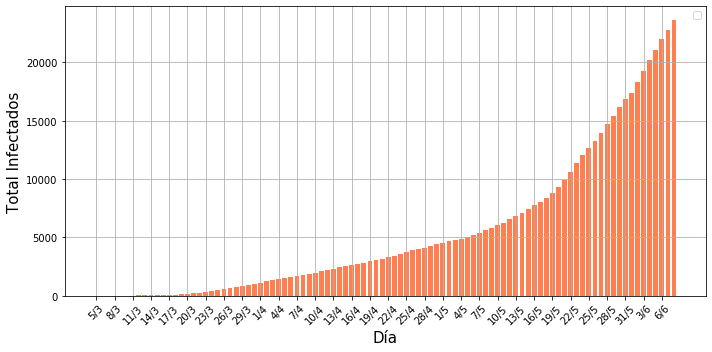

In [23]:
fig, ax = plt.subplots(figsize=(10, 5))

x = fechas # Para hacer hasta el día anterior usar [:-1]

ax.bar(x, casos_total, color='coral')
        
ax.set_xlabel('Día', fontsize=15)
ax.set_ylabel('Total Infectados', fontsize=15)

ax.set_xticks(x[::3])
ax.set_xticklabels(x[::3])

plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
plt.legend(loc='best')
plt.grid()

plt.tight_layout()   
    
plt.show()

#### TO DO

Modificar el código anterior para que en el gráfico se vean en cada barra con distintos colores la proporción de: 

* Opción 1: Recuperados, Fallecidos y los que continúan activos
* Opción 2: Casos importados, locales, comunitarios, los que están en investigación
* Opción 3: Mujeres y Varones
* Opción 4: Provincias. Pueden asignar distintos colores a las 4 o 5 provincias más afectadas y nuclear el resto en un solo color (para esta opción tendrían que usar data2)

Para lograr esto, solo hay que encimar adecuadamente barras replicando la tercer línea de código.

Y por su puesto, también se puede imitar este tipo de gráfico para ver la evolución de otras variables en el tiempo.

5. Análisis por provincias

In [24]:
# Cambiamos el tipo de la columna 'fecha' de object a datetime
data2['fecha'] = pd.to_datetime(data2['fecha'], format='%Y-%m-%d')

In [25]:
# Nos quedamos con un data frame por provincia
bsas = data2[data2['provincia']=='Buenos Aires'].reset_index().drop('index', 1)
caba = data2[data2['provincia']=='CABA'].reset_index().drop('index', 1)
chaco = data2[data2['provincia']=='Chaco'].reset_index().drop('index', 1)
chubut = data2[data2['provincia']=='Chubut'].reset_index().drop('index', 1)
cba = data2[data2['provincia']=='Córdoba'].reset_index().drop('index', 1)

# TO DO
# Completar para todas las provincias

In [26]:
bsas_total = bsas['casos_total']
caba_total = caba['casos_total']
chaco_total = chaco['casos_total']
chubut_total = chubut['casos_total']
cba_total = cba['casos_total']

# TO DO
# Completar para todas las provincias

In [27]:
n0 = len(bsas_total) # Cantidad de días registrados en Buenos Aires
n1 = len(caba_total)
n2 = len(chaco_total)
n3 = len(chubut_total)
n4 = len(cba_total)

# TO DO
# Completar para todas las provincias

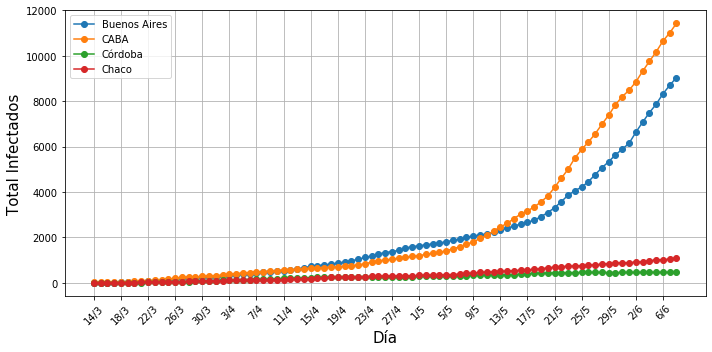

In [28]:
fechas = (caba['fecha'].dt.day).astype(str) +'/'+ (caba['fecha'].dt.month).astype(str)
n = len(fechas)

fig, ax = plt.subplots(figsize=(10, 5))

d = n - 9 # cantidad de días a graficar

x = fechas[-d:]
ax.plot(x, bsas_total[-d:], '-o', label='Buenos Aires')
ax.plot(x, caba_total[-d:], '-o', label='CABA')
ax.plot(x, cba_total[-d:], '-o', label='Córdoba')
ax.plot(x, chaco_total[-d:], '-o', label='Chaco')
        
#ax.set_title('Evolución Temporal de la cantidad de infectados', fontsize=20)
ax.set_xlabel('Día', fontsize=15)
ax.set_ylabel('Total Infectados', fontsize=15)

ax.set_xticks(x[::4])
ax.set_xticklabels(x[::4])

plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
plt.legend(loc='best')
plt.grid()

plt.tight_layout()
    
plt.show()

6. Más ejemplos de gráficos que obtuve con estos datos

<img src="Graficos/Pie_3.png">

<img src="Graficos/Total-por-provincia_3.png">

<img src="Graficos/fallecidos_por_provincia_3.png">

<img src="Graficos/Tiempo-total-infectados-provincias_0.png">

<img src="Graficos/Tiempo-total-recuperados-muertes_3.png">

<img src="Graficos/Tiempo-importado-local-invest-comun_3.png">

Si quieren los códigos me los piden.